In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # adjust the configuration of the plots that w gonna use


#read in the data

data=pd.read_csv('movies.csv')
#Let's look at our data
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [10]:
# Let's see if there is any messing data
Data =data.isnull().sum().any
Data

<bound method NDFrame._add_numeric_operations.<locals>.any of name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64>

In [13]:
#Let's knoe our data type
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
#replace variable in budget and gross null with 0
data['budget']=data['budget'].fillna(0)
data['gross']=data['gross'].fillna(0)
data


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,19000000,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,4500000,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,18000000,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,3500000,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,6000000,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,7000,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,58750,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,15000,NaN,120.0


In [17]:
data.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,NaN,120.0


In [18]:
# Lets change the type of our data
data['budget']=data['budget'].astype('int64')
data['gross']=data['budget'].astype('int64')

In [27]:
data.tail(50)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7618,Play the Flute,NaN,Drama,2019,"March 1, 2019 (United States)",6.9,34.0,Rich Christiano,Rich Christiano,Brett Varvel,United States,0,0,Christiano Film Group,103.0
7619,Geolkapseu,NaN,Action,2019,"May 9, 2019 (South Korea)",5.9,760.0,Jung Da-Won,Jung Da-Won,Mi-ran Ra,South Korea,0,0,CJ Entertainment,107.0
7620,Shed of the Dead,R,Comedy,2019,"May 20, 2019 (United Kingdom)",4.7,1400.0,Drew Cullingham,Drew Cullingham,Spencer Brown,United Kingdom,0,0,7DM Studios,82.0
7621,The Fighting Preacher,PG,Comedy,2019,"July 24, 2019 (United States)",5.9,403.0,T.C. Christensen,T.C. Christensen,David McConnell,United States,0,0,Remember Films,100.0
7622,Junglee,Not Rated,Action,2019,"March 29, 2019 (United States)",5.6,1700.0,Chuck Russell,Adam Prince,Vidyut Jammwal,India,0,0,Junglee Pictures,115.0
7623,The Captain,NaN,Action,2019,"September 30, 2019 (China)",6.2,1700.0,Andrew Lau,Yonggan Yu,Hanyu Zhang,China,0,0,Bona Film Group,111.0
7624,Total Dhamaal,Not Rated,Action,2019,"February 22, 2019 (India)",4.2,5700.0,Indra Kumar,Paritosh Painter,Ajay Devgn,India,0,0,Ajay Devgn Ffilms,130.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,0,0,Visual Arts Entertainment,104.0
7626,No Manches Frida 2,R,Comedy,2019,"March 15, 2019 (United States)",4.2,904.0,Nacho G. Velilla,Claudio Herrera,Martha Higareda,Mexico,0,0,Neverending Media,102.0
7627,Line Walker 2: Invisible Spy,Not Rated,Action,2019,"August 16, 2019 (United States)",6.0,674.0,Jazz Boon,Cat Kwan,Louis Koo,Hong Kong,0,0,Babieka,98.0


In [38]:
# lets sort values by the highest gross 
df=data.sort_values(by= ['gross'], inplace=False, ascending=False)

In [34]:
#Drop any duplicates
data['company'].drop_duplicates()

0              Warner Bros.
1         Columbia Pictures
2                 Lucasfilm
3        Paramount Pictures
4            Orion Pictures
               ...         
7658           Notis Studio
7660    Abominable Pictures
7661         Dow Jazz Films
7665       Embi Productions
7667            PK 65 Films
Name: company, Length: 2386, dtype: object

In [35]:
#budget hight Correlation
#company hight Correlation


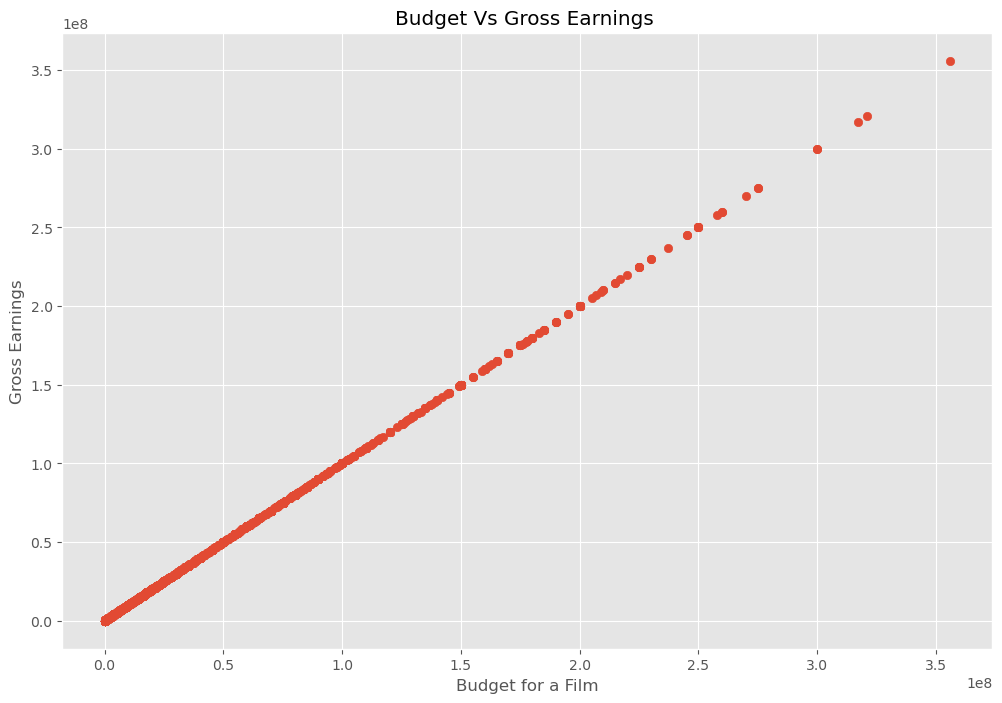

In [41]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings ')
plt.xlabel('Budget for a Film')
plt.ylabel('Gross Earnings')
plt.show()





In [39]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,356000000,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,321000000,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,317000000,Walt Disney Pictures,152.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,300000000,Walt Disney Pictures,169.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,300000000,Warner Bros.,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,One False Move,R,Crime,1992,"May 8, 1992 (United States)",7.1,11000.0,Carl Franklin,Billy Bob Thornton,Bill Paxton,United States,0,0,IRS Media,105.0
2136,Unlawful Entry,R,Crime,1992,"June 26, 1992 (United States)",6.3,15000.0,Jonathan Kaplan,George Putnam,Kurt Russell,Japan,0,0,Largo Entertainment,111.0
2130,Sidekicks,PG,Action,1992,"April 30, 1993 (United States)",5.1,8000.0,Aaron Norris,Lou Illar,Chuck Norris,United States,0,0,Gallery Films,101.0
5916,Martha Marcy May Marlene,R,Drama,2011,"December 21, 2011 (Sweden)",6.9,50000.0,Sean Durkin,Sean Durkin,Elizabeth Olsen,United States,0,0,Fox Searchlight Pictures,102.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

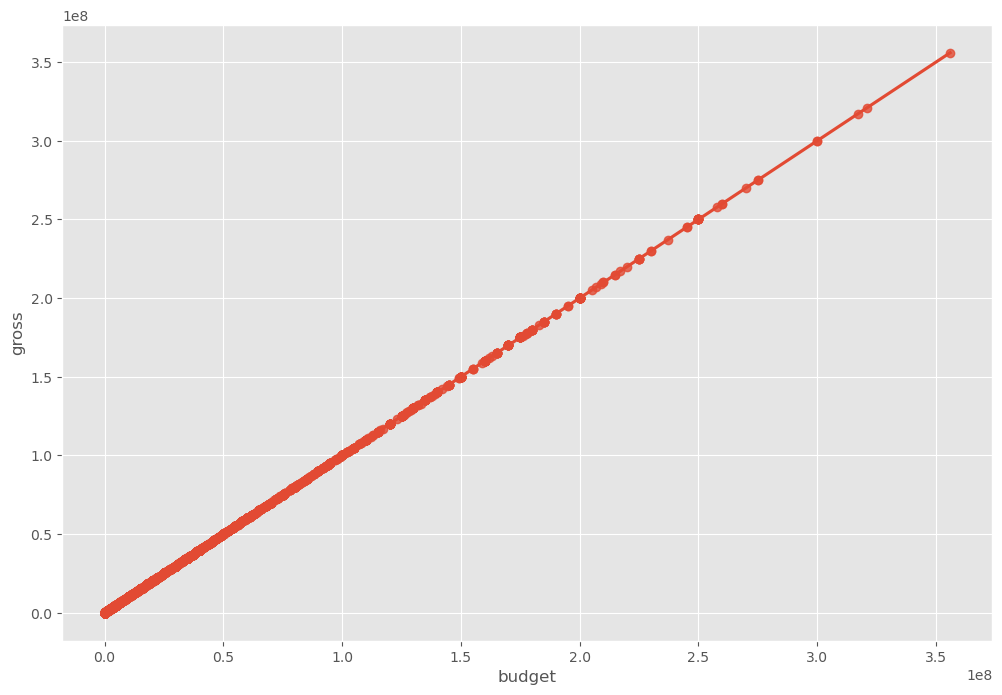

In [44]:
#plot budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data= df)

In [48]:
#lets look for correlation (Correlation matrix)
df.corr(method='pearson')#pearson(bydefault if the brakest are empty) #kendall #spearman (others we need to make a suerch)

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.291152,0.142977
score,0.099045,1.000000,0.428138,-0.007500,-0.007500,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.604627,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,1.000000,0.246748
gross,0.291152,-0.007500,0.604627,1.000000,1.000000,0.246748
runtime,0.142977,0.399857,0.290159,0.246748,0.246748,1.000000


Text(120.72222222222221, 0.5, 'Movie Feature')

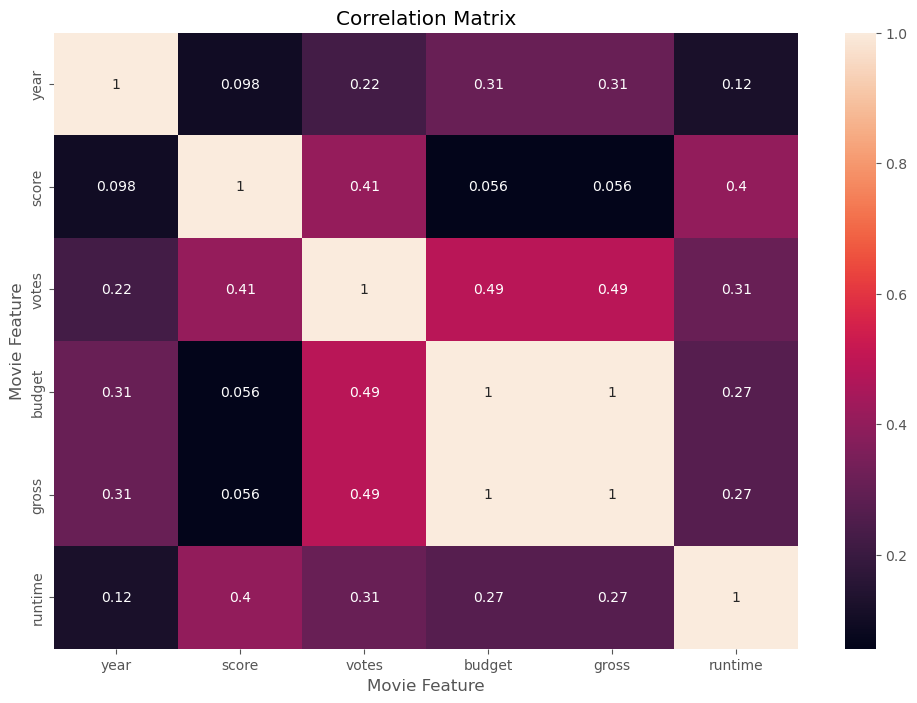

In [51]:
#lets plot correlation matrix
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')



In [52]:
#we want to change other columns that are note numerical to show theme in our correlation matrix

df_numerized=df
for col_name in df_numerized:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes # renvoie les codes numériques associés à chaque élément de la série catégorielle
df_numerized        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,356000000,1606,181.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,321000000,1606,149.0
7075,5145,5,0,2017,661,7.0,581000.0,2282,3518,524,55,317000000,317000000,2316,152.0
5060,4260,5,0,2007,2405,7.1,608000.0,996,4147,1321,55,300000000,300000000,2316,169.0
7066,2984,5,0,2017,2604,6.1,418000.0,2936,1979,220,55,300000000,300000000,2319,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,4049,6,5,1992,2498,7.1,11000.0,374,444,257,55,0,0,1305,105.0
2136,7109,6,5,1992,1829,6.3,15000.0,1475,1477,1542,27,0,0,1470,111.0
2130,4899,4,0,1992,223,5.1,8000.0,3,2635,471,55,0,0,1140,101.0
5916,3490,6,6,2011,744,6.9,50000.0,2522,3888,741,55,0,0,1113,102.0


Text(120.72222222222221, 0.5, 'Movie Feature')

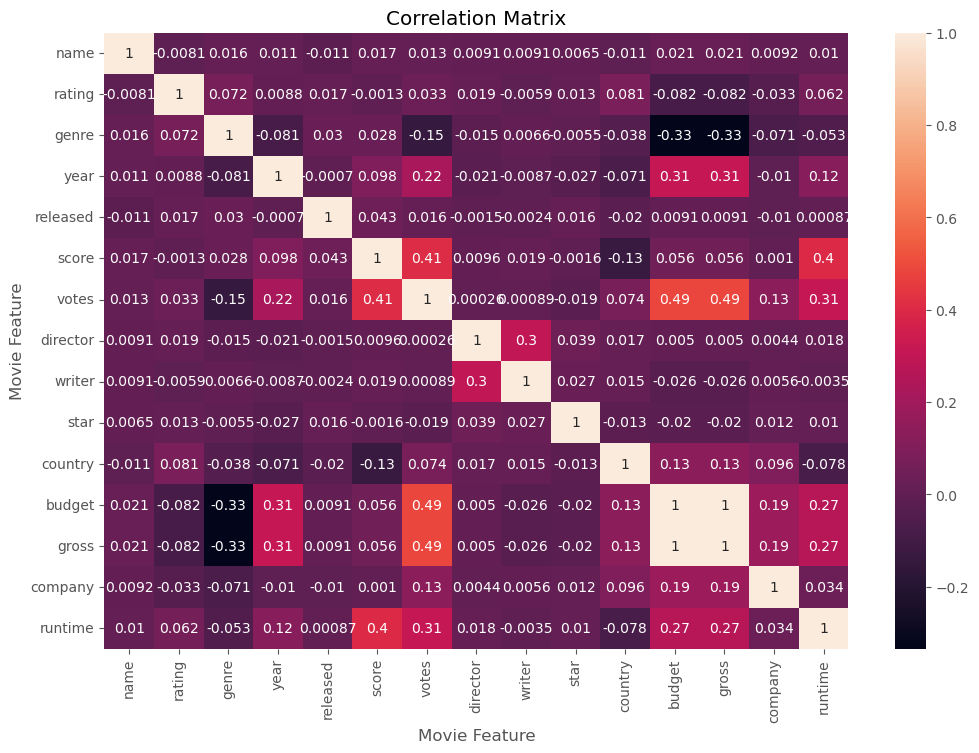

In [53]:
#correlation matrix for all the field 

correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

In [55]:
#lets make our new matrix and show each field his correlation with others
correlation_mat=df_numerized.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.269510
         gross       0.269510
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [56]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre    gross     -0.334021
budget   genre     -0.334021
genre    budget    -0.334021
gross    genre     -0.334021
genre    votes     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [58]:
highst_corr=sorted_pairs[(sorted_pairs)>0.1]
highst_corr

year      runtime     0.120811
runtime   year        0.120811
country   budget      0.131720
gross     country     0.131720
country   gross       0.131720
budget    country     0.131720
company   votes       0.133204
votes     company     0.133204
company   budget      0.186474
          gross       0.186474
gross     company     0.186474
budget    company     0.186474
votes     year        0.222945
year      votes       0.222945
gross     runtime     0.269510
runtime   budget      0.269510
          gross       0.269510
budget    runtime     0.269510
writer    director    0.299067
director  writer      0.299067
year      budget      0.309212
          gross       0.309212
gross     year        0.309212
budget    year        0.309212
votes     runtime     0.309212
runtime   votes       0.309212
          score       0.399451
score     runtime     0.399451
votes     score       0.409182
score     votes       0.409182
budget    votes       0.486862
votes     gross       0.486862
        

In [ ]:
#by the end of this project we found that votes and Budget have the highest correlation to gross earnings

#company haw the lowest correlation